# Machine Learning: A sklearn overview 
<img src="http://blog.bidmotion.com/bidmotion/wp-content/uploads/sites/3/2016/06/supervised-workflow-machine-learning.png">

## Continuous Target Data ($y\in \mathbb{R}$)

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.data.dtype)

float64


In [7]:
print(boston.target.dtype)

float64


In [8]:
train = boston.data
test = boston.target

### Linear Regression
Linear regression fits the data to the follow equation

$\hat{y}_i=\beta_0+\sum_j^p\beta_jx_{i,j}=\beta_0+\mathbf{x}^T\beta$

where $i=1,...,n$ and $p$ is the number of predictors

The error produced by this equation is 

$\epsilon_i=\hat{y_i}-y_i$

For linear regression, the goal is the sum of the errors by using least squares

$\min\left|\sum_i^n\epsilon_i^2\right|$

In [9]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

model = lin_reg.fit(train, test)
print(model.score(train, test))

0.740607742865


(-10, 55)

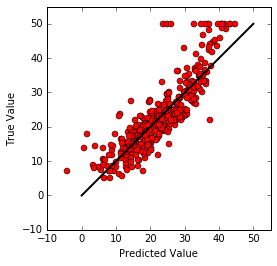

In [10]:
plt.plot(model.predict(train), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

### Ridge Regression
Sometimes there is an issue where the model over-fits the data.  For example, the following figure shows a sine curve fit with a 3 and 9 degree polynomial
<img src="http://i.stack.imgur.com/cwAUJ.png">

When this happens, the solution is not always clear.  So one way is to use ridge regression, which can be used to surpress certain features of the model that cause overfitting.  Rigde regression uses the same model as linear regression but instead of using least squares, ridge regression attempts to minimize

$\min\left|\sum_i^n\epsilon_i^2 + \lambda\sum_j^p\beta_j^2\right|$

Clearly, compared to least squares, this penalizes the squared value of the coefficients.  when this is used, the previous figure has the following result
<img src="http://i.stack.imgur.com/ik06V.png">

In terms of using this in sklearn the following code can be used.

In [11]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=1.0,  # regularization
                               normalize=True,  # normalize X regressors
                               solver='auto')  # options = ‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag'

model = ridge_reg.fit(train, test)
print(model.score(train, test))

0.635014072122


(-10, 55)

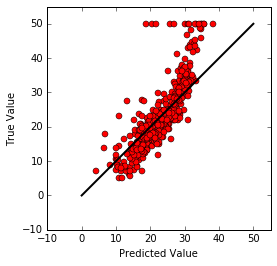

In [12]:
plt.plot(model.predict(train), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

The error rate actually decreased, by making a simplier model.  

### Lasso Regression
A very similar method to ridge regression is lasso regression.  The difference is that the function to minimize is

$\min\left|\sum_i^n\epsilon_i^2 + \lambda\sum_j^p|\beta_j|\right|$

Thus, lasso penalizes the abosulte value of the coeffiecients.  These two methods are commonly visualized as

<img src="https://jamesmccammondotcom.files.wordpress.com/2014/04/screen-shot-2014-04-19-at-11-19-00-pm.png?w=1200">

In sklearn this can be used as

In [13]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=.10,  # regularization
                               normalize=True)  # normalize X regressors

model = lasso_reg.fit(train, test)
print(model.score(train, test))

0.582783031405


(-10, 55)

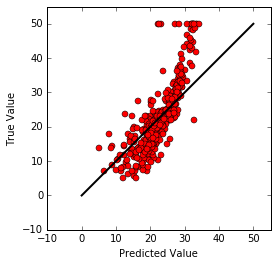

In [14]:
plt.plot(model.predict(train), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

### Elastic Net
Another method to minimize overfitting is the elastic net method.  This is a combination of lasso and ridge.  Thus, this minimizes the following 

$\min\left|\sum_i^n\epsilon_i^2 + \lambda_1\sum_j^p|\beta_j|+\lambda_2\sum_j^p\beta_j^2\right|$

This is in sklearn as

In [15]:
elastic_reg = linear_model.ElasticNet(alpha=1.0,  # penalty, 0 is OLS 
                               selection='cyclic')  # or 'random', which converges faster

model = elastic_reg.fit(train, test)
print(model.score(train, test))

0.686093731552


(-10, 55)

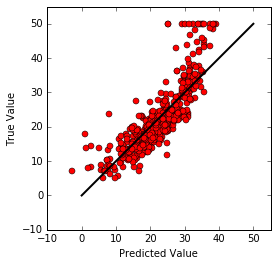

In [16]:
plt.plot(model.predict(train), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

### Polynomial Fits
While linear regression is nice, there is often a need for higher order parameters and cross terms, such as $x^2$ or $x_1x_2$.  In this case the following programs can be used to add the polynomial terms.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3), ridge_reg)
model.fit(train, test)
print(model.score(train, test))

0.824145841871


(-10, 55)

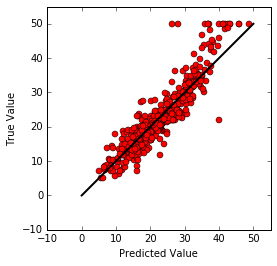

In [18]:
plt.plot(model.predict(train), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

### Random Forest


In [20]:
from sklearn import ensemble

rf_reg = ensemble.RandomForestRegressor(n_estimators=10,  # number of trees
                                        criterion='mse',  # how to measure fit
                                        max_depth=None,  # how deep tree nodes can go
                                        min_samples_split=2,  # samples needed to split node
                                        min_samples_leaf=1,  # samples needed for a leaf
                                        min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                        max_features='auto',  # max feats
                                        max_leaf_nodes=None,  # max nodes
                                        n_jobs=1)  # how many to run parallel

model = rf_reg.fit(train, test)
print(model.score(train, test))

0.97957237416


### Boosting

In [21]:
ab_reg = ensemble.AdaBoostRegressor(base_estimator=None,  # default is DT 
                                    n_estimators=50,  # number to try before stopping
                                    learning_rate=1.0,  # decrease influence of each additional estimator
                                    loss='linear')  # also ‘square’, ‘exponential’


model = ab_reg.fit(train, test)
print(model.score(train, test))

0.900938875655


## Discrete Target Data (classification problem)
### Logistic Regression
For this type of problem the target data takes on discretet values, for example the target be 'yes' or 'no' for a disease, or equivalently '1' or '0'

In [22]:
n_samples = 100
train = np.random.normal(size=n_samples) # make random data set
target = (train > 0).astype(np.float) # make half the values true/1/yes
train[train > 0] *= 2
train += .3 * np.random.normal(size=n_samples) # create abiguity near the transition

train = np.reshape(train, [n_samples, 1])
target = np.reshape(target, [n_samples, 1])

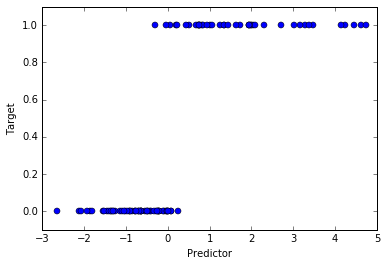

In [23]:
plt.plot(train, target, 'o')
plt.ylim([-.1,1.1])
plt.xlabel('Predictor')
plt.ylabel('Target')

The data above shows that the predictor can estimate the target.  However, if we fit the data with a linear fit, the solution is rather ambigous.

In [24]:
lin_reg = linear_model.LinearRegression()

model = lin_reg.fit(train, target)

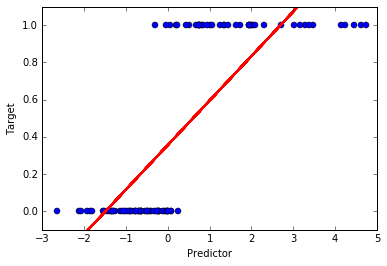

In [25]:
plt.plot(train, target, 'o')
plt.plot(train, model.coef_*train + model.intercept_, 'r-', linewidth=2)
plt.ylim([-.1,1.1])
plt.xlabel('Predictor')
plt.ylabel('Target')

With a linear model, it is hard to really descide what value for the predictor results in a '1' or '0'.  Also hard to really make sense of the negative target predictions.

So, instead we can use logistic regression which fits the following equation

$P(x) = \frac{1}{1+\exp(-\mathbf{x}^T\beta)}$

where again we are trying to fit the coefficeints $\beta$ by using least squares.  Here P(x) can be understood as the probability of predicting a '1'

In [26]:
log_reg = linear_model.LogisticRegression()
target = np.reshape(target, [n_samples, ])
logistic_fit = log_reg.fit(train,target)

logistic_line  = 1/(1+np.exp(-(logistic_fit.coef_*sorted(train)+logistic_fit.intercept_)))

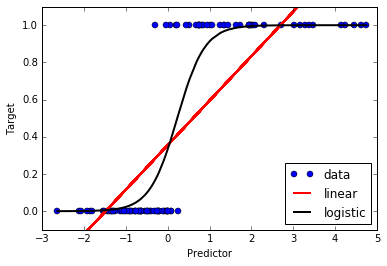

In [27]:
plt.plot(train, target, 'o')
plt.plot(train, model.coef_*train + model.intercept_, 'r-', linewidth=2)
plt.plot(sorted(train), logistic_line, 'k-', linewidth=2)
plt.ylim([-.1,1.1])
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.legend(('data', 'linear', 'logistic'), loc="lower right")

Logistic regression removed negative values and values greater than 1.  Also, thresholding is more intuitive since we are predicting the probability now.  Thus, if we were doing disease prediction, we could threshold depending on how many false positives we want for example by increasing or decreasing the threshold.

However, logistic regression becomes more complicated when there is more than 2 classifications, say even three.  One method is to do logistic regression for each classification.  But usually, it is better to use other methods.

## Multi-class dataset

In [28]:
import sklearn.datasets

In [61]:
num_classes = 4
train, target = sklearn.datasets.make_classification(n_samples=100, n_features=2,
                                                     n_informative=2, n_redundant=0, n_repeated=0,
                                                     n_clusters_per_class=1, n_classes=num_classes)

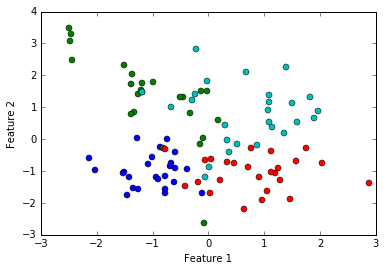

In [62]:
for group in range(num_classes):
    plt.plot(train[target==group][:,0],train[target==group][:,1], 'o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Here I have plotted each of the classes as a different color.  

### Naive Bayes
The first method to approach this is naive bayes, which got its name for using bayes theorem to predict the classifer.
The goal of the method is to find the classifier of a point based on the maximum of the probabilies 

$P(y|\mathbf{x})$

which with bayes theorem becomes

$P(y|\mathbf{x}) = \frac{P(y_i)P(\mathbf{x}|y)}{P(\mathbf{x})}$

if we assume independence between the different features of x, then

$P(\mathbf{x}|y) = \prod_i^nP(x_i|y)$

Thus, we can make our prediction based on

$\hat{y} = \max P(y)\prod_i^nP(x_i|y)$

And lastly, we can then assume the shape of $P(x_i|y)$, often assumed to be a multivariate gaussian.

In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb_fit = gnb.fit(train, target)

gnb_pred = gnb_fit.predict(train)

print((gnb_pred!=target).sum()/100.)

0.19


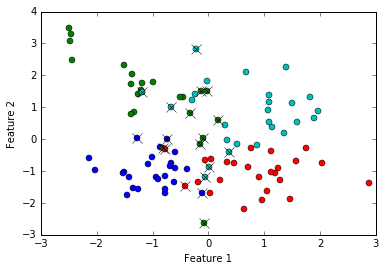

In [64]:
for group in range(num_classes):
    plt.plot(train[target==group][:,0],train[target==group][:,1], 'o')
plt.plot(train[gnb_pred!=target][:,0], train[gnb_pred!=target][:,1], 'kx', markersize = 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

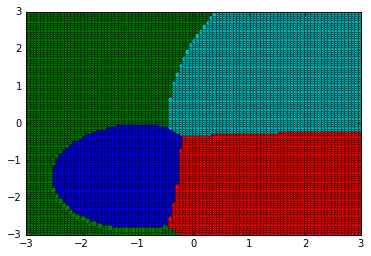

In [66]:
side = np.linspace(-3,3,100)
X,Y = np.meshgrid(side,side)

X = np.reshape(X, [-1])
Y = np.reshape(Y, [-1])

points = np.column_stack((X,Y))

pred = gnb_fit.predict(points)

for i in range(num_classes):
    plt.plot(points[pred==i][:,0],points[pred==i][:,1],'o')

The nice about this method is that it is fairly simple to excute and understand.  However it is only accurate when classes are well defined locally, which may not always be the case.

### K-nearest neighbors
The next method that could be used is k nearest neighbors, or knn.  This method can also work very well for continues data, but I think it is easier to visualize and explain as a classification model.

This method works on the idea that if you look to the k train data points nearest to the point x, then you can determine the class based on the most common class of the nearest points.  Often, euclidean distance is used for this, but other methods of deciding the nearest neighbor is possible, such as weighting the strength of nearest neighbor based on its distance.

If k == 1, this is equivalent to using a step function.

In [67]:
from sklearn import neighbors
nbrs = neighbors.KNeighborsClassifier(n_neighbors=1)
nbrs_fit = nbrs.fit(train, target)

nbrs_pred = nbrs_fit.predict(train)

print((nbrs_pred!=target).sum()/100.)

0.0


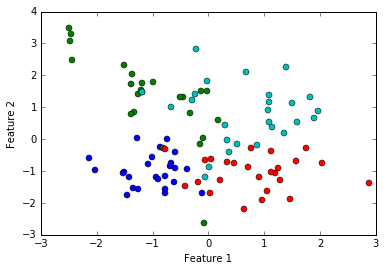

In [68]:
for group in range(num_classes):
    plt.plot(train[target==group][:,0],train[target==group][:,1], 'o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

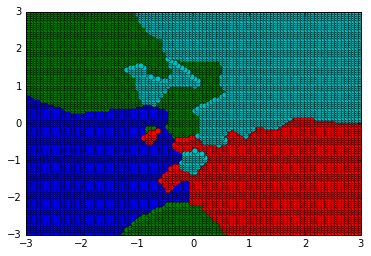

In [69]:
pred = nbrs_fit.predict(points)

for i in range(num_classes):
    plt.plot(points[pred==i][:,0],points[pred==i][:,1],'o')

However, using k = 1 is overfitting the data. We will try using 15 now.  It will increase the number of incorrect train data that are mislabeled, but should increase the test error rate

0.21


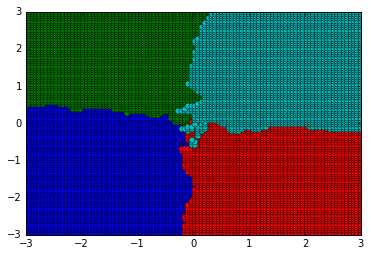

In [70]:
from sklearn import neighbors
nbrs = neighbors.KNeighborsClassifier(n_neighbors=15)
nbrs_fit = nbrs.fit(train, target)

nbrs_pred = nbrs_fit.predict(train)

print((nbrs_pred!=target).sum()/100.)

pred = nbrs_fit.predict(points)

for i in range(num_classes):
    plt.plot(points[pred==i][:,0],points[pred==i][:,1],'o')

While k nearest neighbors is a very powerful classifing algorithm, it suffers from dimensionality.  This method works great for the above example because we only have 2 features, but as the feature size increases to large numbers, the euclidean space increases by power law.

### SVM (support vector machine)
A method that overcomes the dimensionality issue of knn, and overcomes the simpliest of naive bayes, is SVM, support vector machines.  It is probably one of the most popular machine learning algorithms.  It can be used for both classification problems and continues target problems.  The disadvantage is the computational cost of the method.

SVM is another model that can be used for continous target problems, but I feel is easier to understand on a classification problem.

First, the idea behind SVM is to fit a hyperplane that divides the different classes.  However, determining the best hyperplane can be complex as shown in the following figure
<img src="https://computersciencesource.files.wordpress.com/2010/01/svmafter.png">

Clearly, the decision is arbitrary.  SVM thus tries to maximize the distance of the points to the plane, by using the maximal margin classifier.  However, this idea clearly will only work when the points are serperable by a plane.  To correct for this, SVM was created with a generalized method that can use any K(x) kernel.  The previous example, used a linear kernel, but gaussian, polynomial, and many other kernels also exist.  The effects of kernel can be seen in the following image
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_0012.png">

This method has had great success.  To use it in sklearn is similar to the previous methods. By default, this uses RBF kernel

In [71]:
from sklearn import svm
svm_method = svm.SVC()
svm_fit = svm_method.fit(train, target)

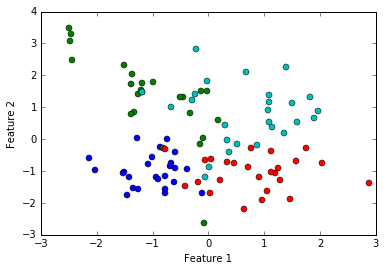

In [72]:
for group in range(num_classes):
    plt.plot(train[target==group][:,0],train[target==group][:,1], 'o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

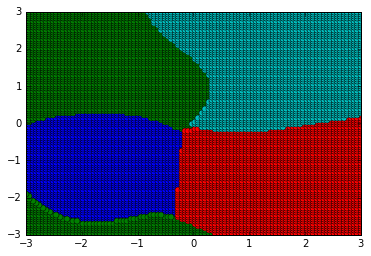

In [74]:
pred = svm_fit.predict(points)

for i in range(num_classes):
    plt.plot(points[pred==i][:,0],points[pred==i][:,1],'o')

This used the gaussian kernel.

## Organizing Your Data
### Train/test data sets
A crucial part of machine learning is obtaining a training data set to build the model and a testing data set to verify the success of the model.  The purpose of a new test data set that was not used in building the model is that if the model is tested against the training data, the model may be overfit.  For example, if the model fits the train data perfectly, there is a good chance that the predictions on new data are poor.
<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Overfitted_Data.png">

The above figure shows how a high order polynomial can overfit a simple line.  Thus, it is important to split the data into train and test data, and a strong model will have a low test data error rate.

To do this with sklearn, there is a package to split data sets into train and test

In [41]:
from sklearn.cross_validation import train_test_split

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    train_size=0.8, test_size=0.2)

The above function splits the data into 80% train and 20% test data.  Generally, it is recommended to use somewhere around a 80:20 split.  Now in all the previous models, the predict function can be used on the X_test data and the error can be tested on y_test.  This method helps prevent against over fitted modeling.

### Cross-validation
One issue with the above method of splitting the data is that we did it randomly and blindly.  This can lead to high variance in the models, if the split accidentally places all of one class in the train and all of a different class in the test data.  Another issue is, by splittling the data 80:20, we have reduced the sample size of the data we are using to build our model.  What if we want to keep the same sample size but also have a test set?  Similaly, if the dataset is originally small, we may want to not waste train data.

One way to overcome both of these issues is to use cross validation.  In cross validation, we split the data into train data and test data, but we do this multiple times such that we build a model with all data.  We then get a final model by averaging the multiple models.

Several methods for this exist, one such method is called leave-one-out cross-validation.  This splits the data into train and test sets, where the test set only has one case.  The model is created for each of the n-1 possible train sets.  This works well until n becomes very large.

Another common validation method is k-fold cross validation, this splits the data set into k even groups, and makes k models with each group used as a test set once.  The final model is then averaged. Using cross-validation helps greatly with the bias-variance trade-off in machine learning.

To do cross-validation in sklearn, the model is first chosen then provided to the following method

In [42]:
from sklearn.model_selection import cross_val_predict
lin_reg = linear_model.LinearRegression()

predicted_values = cross_val_predict(lin_reg, boston.data, boston.target, cv=5)


ImportError: No module named model_selection

The previous code uses 5-fold cross-validation to predict the values for the boston data with a linear model.

### PCA
Sometimes, there are too many features to describe the target, maybe some features are duplicates or combinations of other features, or maybe some features just dont correlate well with the target.  In these cases it is good to reduce the feature space, because the lower the dimension the easier it is to create a model and the easier it is for us to comprehend with our simple brains.

A common way to reduce the feature space is to use principle component analysis.  PCA computes the directions that best describe the data.  Here is a 2-d exmaple
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/720px-GaussianScatterPCA.svg.png">

This shows that pca will change from x,y to vectors that better describe the data.  PCA in sklearn is determined by SVD and can be used with the following commands

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) #returns the same number of features as the original set
pca_fit = pca.fit(boston.data)
print(pca.explained_variance_ratio_)


[  8.05814643e-01   1.63050854e-01   2.13486883e-02   6.95695814e-03
   1.30786367e-03   7.27742761e-04   4.20024207e-04   2.48721489e-04
   8.53904192e-05   3.08110199e-05   6.65495193e-06   1.56785857e-06
   7.96571657e-08]


The printed values show the significance of the principle compnent.  Thus, we can reduce the feature space by say only keeping the principle components that explain more than 90% of the data, which means we would only keep the first two principle compenents here.

In [44]:
pca = PCA(n_components=3) #returns 3 componenets
pca_fit = pca.fit(boston.data)
print(pca.explained_variance_ratio_)

[ 0.80581464  0.16305085  0.02134869]


Now we can transform the data to use in the models

In [45]:
new_boston = pca.fit_transform(boston.data)

Now we can use this in our models.  We now only have 2 features, thus building the models will be far simplier.

0.287702290199


(-10, 55)

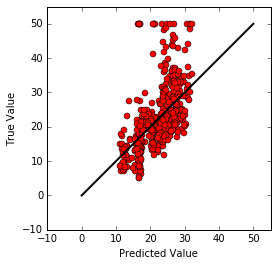

In [46]:
lin_reg = linear_model.LinearRegression()

model = lin_reg.fit(new_boston, test)
print(model.score(new_boston, test))

plt.plot(model.predict(new_boston), test, 'ro')
plt.plot([0,50],[0,50], 'k', linewidth = 2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.axis('square')
plt.ylim([-10, 55])
plt.xlim([-10, 55])

The error rate may have increased, but we can see that a majority of the prediction has been maintained while significantly decreasing the complexity of the model.

## Auto ML
For a lot of these methods, there are a of parameters that need to be tuned in order to best optimize the model.  One way to do this is simply to iterate over a range of parameters to try and find a optimize model.  However, there are packages created that will do this for us.  One such package is 

from autosklearn.regression import AutoSklearnRegressor

This package will auto tune the parameters to best fit the model.

## Ensemble averaging
As a last note I will point out that one of the popular and successful methods to use in machine learning in ensemble averaging.  For this, one would great several cross validated models for the training data, meaning for a classification problem, one might use naive bayes, knn, svm, LDA, etc.  Then they obtain the predicted classes for each model, and average over the models (sometimes the average is weighted to prioritize different models).  I have personally seen the test error rate significantly decreases by simply ensembling different methods. 

The error decreases because different models have different strengths and different weaknesses, and by averaging over them, the errors of each model can be decreased.

There are packages that can do this ensembling for you, or you can just run each model and average yourself.

## Last Thoughts of Sklearn
As I mentioned, I originally learned all these methods for R, however, I can safely say that learning to use these methods is python was not very difficult, I believe it is because of the better documentation and snytax of sklearn, but it could be because of prior knowledge from using R.  Overall, I would say that sklearn is a lot nicer to use though than R.